1. Explore Keras datasets


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

MNIST Dataset

In [3]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print("MNIST train shape:", xtrain.shape)

MNIST train shape: (60000, 28, 28)


In [6]:
print("MNIST test shape :", xtest.shape)

MNIST test shape : (10000, 28, 28)


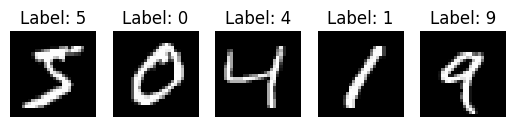

In [8]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f"Label: {ytrain[i]}")
    plt.axis('off')
plt.show()

CIFAR-10 Dataset

In [9]:
(xtrain1, ytrain1), (xtest1, ytest1) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
print("CIFAR-10 train shape:", xtrain1.shape)

CIFAR-10 train shape: (50000, 32, 32, 3)


In [11]:
print("Image Dimensions:", xtrain1[1].ndim)

Image Dimensions: 3


In [12]:
print("Data Type:", xtrain1[1].dtype)

Data Type: uint8


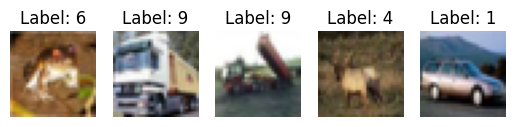

In [13]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(xtrain1[i])
    plt.title(f"Label: {ytrain1[i][0]}")
    plt.axis("off")
plt.show()

Fashion-MNIST Dataset

In [14]:
(xtrain2, ytrain2), (xtest2, ytest2) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
print("Fashion-MNIST train shape:", xtrain2.shape)

Fashion-MNIST train shape: (60000, 28, 28)


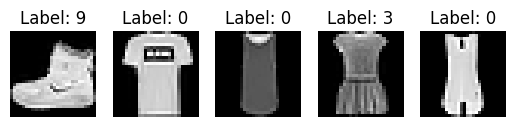

In [16]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(xtrain2[i], cmap='gray')
    plt.title(f"Label: {ytrain2[i]}")
    plt.axis("off")
plt.show()

2. Implement regression using DNN model for pizza price.

In [1]:
import pandas as pd

In [9]:
import pandas as pd
df = pd.read_csv('pizza_price.csv')
df.head()

,Restaurant,Extra_Cheeze,Extra_Mushroom,Size_Inch,Extra_Spicy,Price
0,A,1,1,12,0,650
1,B,0,1,15,1,800
2,C,0,0,9,0,500
3,D,1,0,12,1,700
4,E,1,0,12,1,750


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

target and features

In [10]:
x = df.drop(columns=['Restaurant','Price'])

In [11]:
x.head()

,Extra_Cheeze,Extra_Mushroom,Size_Inch,Extra_Spicy
0,1,1,12,0
1,0,1,15,1
2,0,0,9,0
3,1,0,12,1
4,1,0,12,1


In [12]:
y=df['Price']

Model Development

In [13]:
from keras.models import Sequential

In [14]:
from keras.layers import Dense, Activation, Dropout

In [15]:
model=Sequential()

In [16]:
from tensorflow import keras

In [17]:
model.add(keras.Input(shape=(4,)))

In [18]:
model.add(Dense(128,activation='relu'))

In [19]:
model.add(Dense(64,activation='relu'))

In [20]:
model.add(Dense(32,activation='relu'))

In [21]:
model.add(Dropout(rate=0.01))

In [22]:
model.add(Dense(16,activation='relu'))

In [23]:
model.add(Dropout(rate=0.01))

In [24]:
model.add(Dense(8,activation='relu'))

In [25]:
model.add(Dropout(rate=0.01))

In [26]:
model.add(Dense(4,activation='relu'))

In [27]:
model.add(Dense(1))

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,681 (45.63 KB)

 Trainable params: 11,681 (45.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00


In [30]:
import visualkeras

Compile the model

In [32]:
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

Training the Model

In [33]:
from keras.callbacks import ModelCheckpoint

In [34]:
checkpoint1=ModelCheckpoint('pizza_mpdel1.keras',monitor='mae',
save_best_only=True,verbose=2)

In [35]:
history1=model.fit(x,y,epochs=100,validation_split=0.2,batch_size=8,
verbose=2,callbacks=[checkpoint1])

Epoch 1/100

Epoch 1: mae improved from inf to 703.05005, saving model to pizza_mpdel1.keras
2/2 - 3s - 1s/step - loss: 703.0500 - mae: 703.0500 - val_loss: 824.8545 - val_mae: 824.8545
Epoch 2/100

Epoch 2: mae improved from 703.05005 to 702.95819, saving model to pizza_mpdel1.keras
2/2 - 0s - 71ms/step - loss: 702.9582 - mae: 702.9582 - val_loss: 824.7917 - val_mae: 824.7917
Epoch 3/100

Epoch 3: mae improved from 702.95819 to 702.89667, saving model to pizza_mpdel1.keras
2/2 - 0s - 70ms/step - loss: 702.8967 - mae: 702.8967 - val_loss: 824.7314 - val_mae: 824.7314
Epoch 4/100

Epoch 4: mae improved from 702.89667 to 702.82495, saving model to pizza_mpdel1.keras
2/2 - 0s - 66ms/step - loss: 702.8250 - mae: 702.8250 - val_loss: 824.6644 - val_mae: 824.6644
Epoch 5/100

Epoch 5: mae improved from 702.82495 to 702.76141, saving model to pizza_mpdel1.keras
2/2 - 0s - 74ms/step - loss: 702.7614 - mae: 702.7614 - val_loss: 824.5842 - val_mae: 824.5842
Epoch 6/100

Epoch 6: mae improved fro

In [36]:
his1=pd.DataFrame(history1.history)

In [37]:
his1.head()

,loss,mae,val_loss,val_mae
0,703.050049,703.050049,824.854492,824.854492
1,702.958191,702.958191,824.791748,824.791748
2,702.896667,702.896667,824.731445,824.731445
3,702.824951,702.824951,824.664429,824.664429
4,702.761414,702.761414,824.584229,824.584229


In [38]:
import matplotlib.pyplot as plt

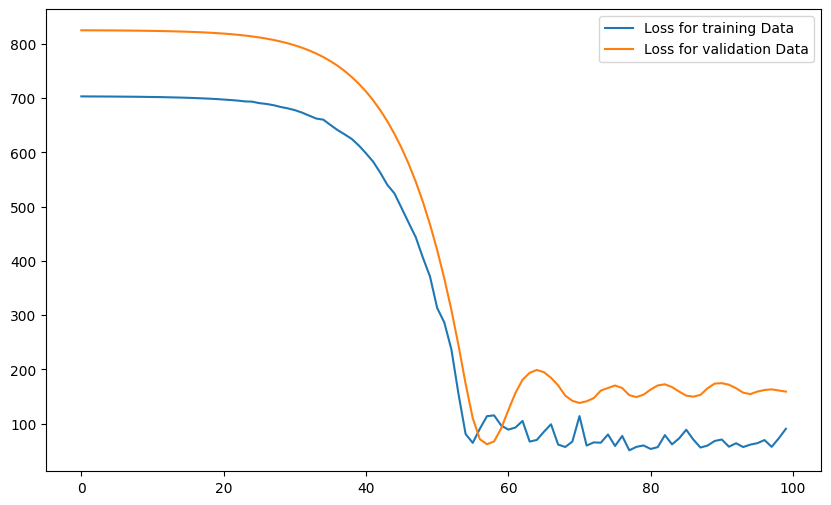

In [39]:
plt.figure(figsize=(10,6))
plt.plot(his1['loss'],label='Loss for training Data')
plt.plot(his1['val_loss' ],label='Loss for validation Data' )
plt.legend()

3. Implement regression using DNN model for diabetes data from sklearn.

In [40]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [41]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [42]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
x = df.drop(columns=['target'])

In [43]:
x.head()

,Extra_Cheeze,Extra_Mushroom,Size_Inch,Extra_Spicy
0,1,1,12,0
1,0,1,15,1
2,0,0,9,0
3,1,0,12,1
4,1,0,12,1


In [44]:
y = df['target']

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras

In [46]:
model = Sequential()

In [47]:
model.add(keras.Input(shape=(x.shape[1],)))

In [48]:
model.add(Dense(128, activation='relu'))

In [49]:
model.add(Dense(64, activation='relu'))

In [50]:
model.add(Dense(32, activation='relu'))

In [51]:
model.add(Dropout(0.01))

In [52]:
model.add(Dense(16, activation='relu'))

In [53]:
model.add(Dropout(0.01))

In [54]:
model.add(Dense(8, activation='relu'))

In [55]:
model.add(Dropout(0.01))

In [56]:
model.add(Dense(4, activation='relu'))

In [57]:
model.add(Dense(1))

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,681 (45.63 KB)

 Trainable params: 11,681 (45.63 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [60]:
from keras.callbacks import ModelCheckpoint

In [61]:
checkpoint1 = ModelCheckpoint(
    'diabetes_model.keras', monitor='mae', save_best_only=True,verbose=2)

In [62]:
history1 = model.fit(
    x, y,epochs=100,
    validation_split=0.2,batch_size=8,verbose=2,callbacks=[checkpoint1])

Epoch 1/100

Epoch 1: mae improved from inf to 140.56200, saving model to diabetes_model.keras
2/2 - 3s - 2s/step - loss: 140.5620 - mae: 140.5620 - val_loss: 143.7480 - val_mae: 143.7480
Epoch 2/100

Epoch 2: mae improved from 140.56200 to 140.56000, saving model to diabetes_model.keras
2/2 - 0s - 80ms/step - loss: 140.5600 - mae: 140.5600 - val_loss: 143.7460 - val_mae: 143.7460
Epoch 3/100

Epoch 3: mae improved from 140.56000 to 140.55800, saving model to diabetes_model.keras
2/2 - 0s - 78ms/step - loss: 140.5580 - mae: 140.5580 - val_loss: 143.7440 - val_mae: 143.7440
Epoch 4/100

Epoch 4: mae improved from 140.55800 to 140.55554, saving model to diabetes_model.keras
2/2 - 0s - 76ms/step - loss: 140.5555 - mae: 140.5555 - val_loss: 143.7407 - val_mae: 143.7407
Epoch 5/100

Epoch 5: mae improved from 140.55554 to 140.55241, saving model to diabetes_model.keras
2/2 - 0s - 85ms/step - loss: 140.5524 - mae: 140.5524 - val_loss: 143.7370 - val_mae: 143.7370
Epoch 6/100

Epoch 6: mae im

In [63]:
his1 = pd.DataFrame(history1.history)

In [64]:
his1.head()

,loss,mae,val_loss,val_mae
0,140.561996,140.561996,143.748001,143.748001
1,140.559998,140.559998,143.746002,143.746002
2,140.557999,140.557999,143.744003,143.744003
3,140.555542,140.555542,143.740738,143.740738
4,140.552414,140.552414,143.736969,143.736969


In [65]:
import matplotlib.pyplot as plt

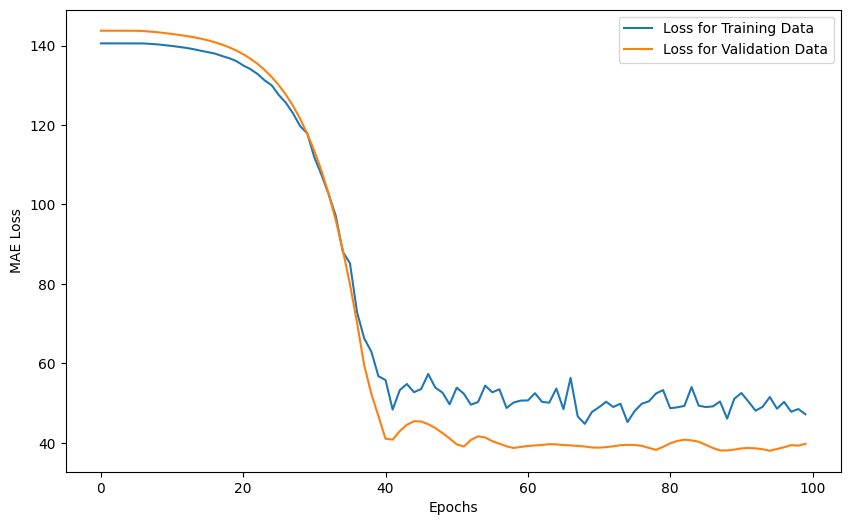

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(his1['loss'], label='Loss for Training Data')
plt.plot(his1['val_loss'], label='Loss for Validation Data')
plt.xlabel("Epochs")
plt.ylabel("MAE Loss")
plt.legend()
plt.show()

4. Implement MNIST digit classification using tensorflow.